In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mawarwiliyanti","key":"9b36d17610bd35878637447fafbdf7e9"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d uom190346a/sleep-health-and-lifestyle-dataset

  0% 0.00/2.54k [00:00<?, ?B/s]
100% 2.54k/2.54k [00:00<00:00, 5.22MB/s]


In [5]:
!mkdir sleep-health-and-lifestyle-dataset
!unzip sleep-health-and-lifestyle-dataset.zip -d sleep-health-and-lifestyle-dataset
!ls sleep-health-and-lifestyle-dataset

Archive:  sleep-health-and-lifestyle-dataset.zip
  inflating: sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv  
Sleep_health_and_lifestyle_dataset.csv


#Deskripsi Library yang digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Memanggil dataset

In [7]:
df= pd.read_csv('sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

#Deskripsi dataset

In [8]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


<Axes: >

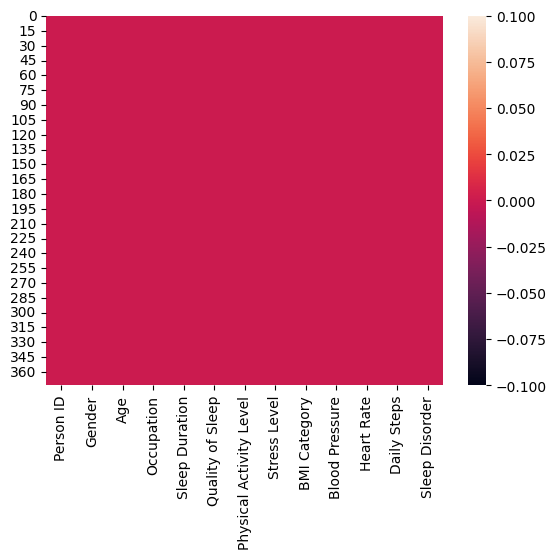

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#Visualisasi data

<ipython-input-12-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

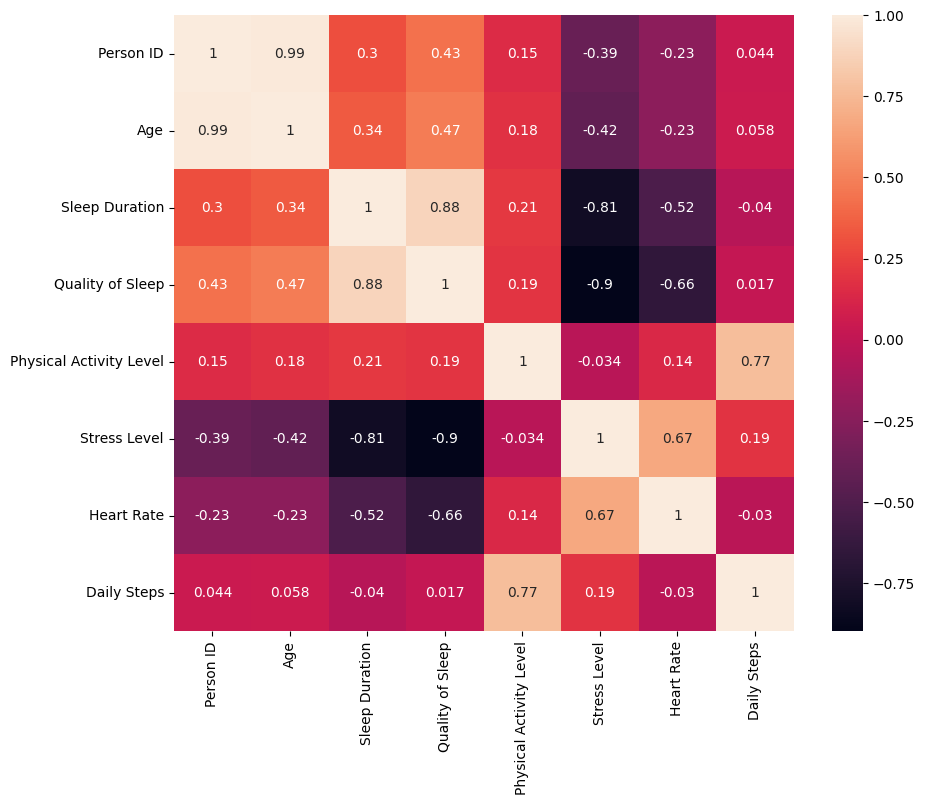

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [13]:
df.iloc[:,[1]].value_counts()

Gender
Male      189
Female    185
dtype: int64

In [14]:
df.iloc[:,[3]].value_counts()

Occupation          
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
dtype: int64

In [15]:
df.iloc[:,[5]].value_counts()

Quality of Sleep
8                   109
6                   105
7                    77
9                    71
5                     7
4                     5
dtype: int64

In [16]:
df.iloc[:,[8]].value_counts()

BMI Category 
Normal           195
Overweight       148
Normal Weight     21
Obese             10
dtype: int64

In [17]:
df.loc[df['BMI Category']=='Normal Weight',['BMI Category']] = 'Normal'
df.iloc[:,[8]].value_counts()

BMI Category
Normal          216
Overweight      148
Obese            10
dtype: int64

In [18]:
(df.iloc[:,[12]].value_counts()/df.iloc[:,[12]].value_counts().sum())*100

Sleep Disorder
None              58.556150
Sleep Apnea       20.855615
Insomnia          20.588235
dtype: float64

#Kualitas tidur berdasarkan profesi

In [19]:
df1 = df.groupby('Occupation')[['Quality of Sleep','Sleep Duration']].mean().sort_values(by=['Quality of Sleep'])

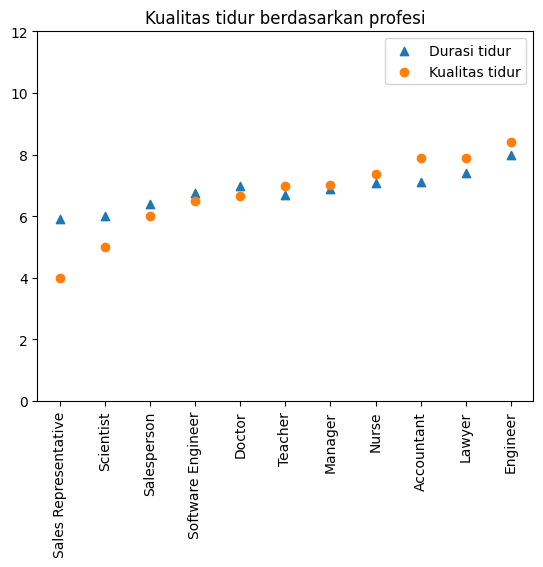

In [20]:
ax = plt.subplot(1,1,1)
x = pd.Series(df1.index,dtype='category')
ax.scatter(x,y=df1['Sleep Duration'].to_numpy(),marker='^')
ax.scatter(x,y=df1['Quality of Sleep'].to_numpy())
plt.xticks(rotation=90)
plt.legend(['Durasi tidur','Kualitas tidur'])
plt.ylim(0,12)
plt.title('Kualitas tidur berdasarkan profesi')
plt.show()

#Kualitas tidur berdasarkan tingkat aktivitas fisik dan tingkat stress



In [21]:
df2 = df.groupby('Quality of Sleep')[['Physical Activity Level','Stress Level']].mean()

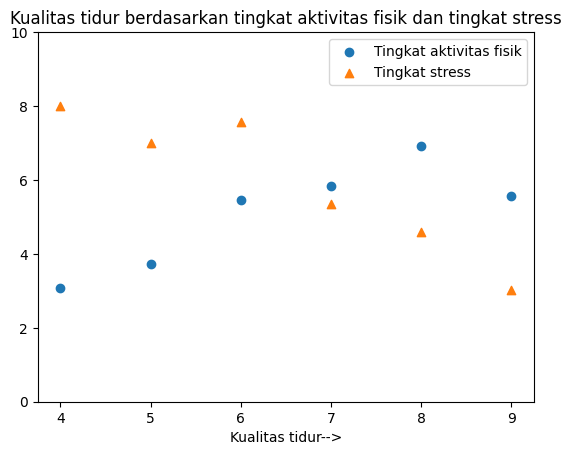

In [22]:
ax = plt.subplot(1,1,1)
x = df2.index
ax.scatter(x,df2['Physical Activity Level'].to_numpy()/10,marker='o')
ax.scatter(x,df2['Stress Level'].to_numpy(),marker='^')
ax.set_xlabel('Kualitas tidur-->')
plt.ylim(0,10)
plt.title('Kualitas tidur berdasarkan tingkat aktivitas fisik dan tingkat stress')
plt.legend(['Tingkat aktivitas fisik','Tingkat stress'])
plt.show()

#Distribusi Quality of sleep

<ipython-input-23-d49492a2b2b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quality of Sleep'])


<Axes: xlabel='Quality of Sleep', ylabel='Density'>

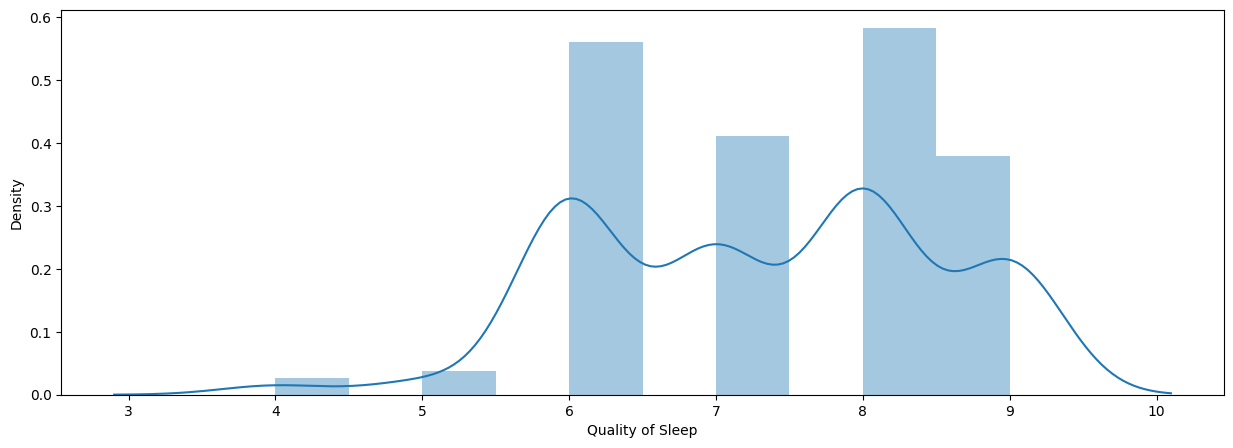

In [23]:
plt.figure(figsize=(15,5))
sns.distplot(df['Quality of Sleep'])

#Seleksi Fitur

In [24]:
features = ['Person ID', 'Age',	'Sleep Duration',	'Physical Activity Level',	'Stress Level',	'Heart Rate',	'Daily Steps']
x = df[features]
y = df['Quality of Sleep']
x.shape, y.shape

((374, 7), (374,))

#Split data training dan data testing

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(94,)

#Membuat Model Regresi Linier

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [27]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8707745033453198


#Membuat inputan model regresi linier

In [28]:
#Person ID= 8, Age=32, Sleep Duration=6.1, Physical Activity Level=42, stress level=8, heart rate=85, daily steps=4200
input_data = np.array([[8,32,6.1,42,8,85,4200]])

prediction = lr.predict(input_data)
print('Tingkat kualitas tidur :', prediction)

Tingkat kualitas tidur : [5.05563468]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Save model

In [29]:
import pickle

filename ='kualitas_tidur.sav'
pickle.dump(lr,open(filename,'wb'))

#Evaluasi

In [30]:
from sklearn.metrics import r2_score

features = ['Person ID', 'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
x = df[features]
y = df['Quality of Sleep']

model = LinearRegression()
model.fit(x, y)

# Melakukan prediksi menggunakan model
y_pred = model.predict(x)
r_squared = r2_score(y, y_pred)

# Menampilkan R-squared
print("Skor Akurasi (R-squared):", r_squared)


Skor Akurasi (R-squared): 0.9115004951252951
